In [1]:
 # Identifying Psychiatric Disorders Using Machine-Learning (Dataset)
# Analyse and visulaise the EEG.machinelearning_data_BRMH.csv from dataset folder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
datasets_folder = '/Users/aiviewgroup/Desktop/projects/medAI/medai_models/datasets/'
data_file = datasets_folder + 'EEG.machinelearing_data_BRMH.csv'
data=pd.read_csv(data_file)
#print(data.head())
# find the number of rows and columns in the dataset
print(data.shape)
# find all the cloumns in the dataset  
print(data.columns)
# show all the data in the output
print(data.info())

(945, 1149)
Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB
None


In [3]:
data=data.rename(columns={"specific.disorder": "sd", "main.disorder": "md"})

In [4]:
print(data['sd'].value_counts())
print(data['md'].value_counts())

Depressive disorder               199
Schizophrenia                     117
Healthy control                    95
Alcohol use disorder               93
Behavioral addiction disorder      93
Bipolar disorder                   67
Panic disorder                     59
Posttraumatic stress disorder      52
Social anxiety disorder            48
Obsessive compulsitve disorder     46
Acute stress disorder              38
Adjustment disorder                38
Name: sd, dtype: int64
Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: md, dtype: int64


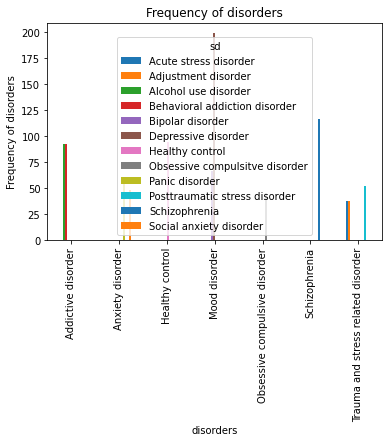

In [5]:
# visulaise the data

pd.crosstab(data.md,data.sd).plot(kind='bar')
plt.title('Frequency of disorders')
plt.xlabel('disorders')
plt.ylabel('Frequency of disorders')
plt.savefig('purchase_fre_job')


In [6]:
# find null values in the dataset
print(data.isnull().sum())
# replace NA values with 0
data = data.fillna(0)
print(data.nunique())
print(data.isnull().sum())
# remove the date column
data = data.drop(['eeg.date'], axis=1)
data=data.drop(['no.'], axis=1)

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64
no.                      945
sex                        2
age                      654
eeg.date                 722
education                 19
                        ... 
COH.F.gamma.p.P4.r.O1    942
COH.F.gamma.p.P4.s.O2    942
COH.F.gamma.q.T6.r.O1    942
COH.F.gamma.q.T6.s.O2    942
COH.F.gamma.r.O1.s.O2    942
Length: 1149, dtype: int64
no.                      0
sex                      0
age                      0
eeg.date                 0
education                0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1149, dtype: i

In [7]:
data.head()


,sex,age,education,IQ,md,sd,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,M,57.0,0.0,0.0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,M,37.0,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,M,32.0,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,M,35.0,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,M,36.0,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [8]:
md = LabelEncoder()
data['md'] = md.fit_transform(data['md'])
data['md'].value_counts()
# encode column with values 1 and 0
sex=LabelEncoder()
data['sex'] = sex.fit_transform(data['sex'])
data['sex'].value_counts()

1    601
0    344
Name: sex, dtype: int64

In [9]:
# decode the data
sex.inverse_transform(data['sex'])


array(['M', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [10]:
data=data.drop(['sd'], axis=1)
X = data.drop('md', axis = 1)
y = data['md']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [12]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Use SGDClassifier to train the model
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
# Use the model to predict the test set
y_pred = sgd.predict(X_test)
# Use confusion matrix to evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Use classification report to evaluate the model
cr = classification_report(y_test, y_pred)
print(cr)





[[11  1  1 10  2  5  4]
 [ 3  0  1  8  1  1  2]
 [ 6  0  6  5  0  1  1]
 [10  9  1 21  0  9  6]
 [ 3  0  1  3  1  0  1]
 [ 3  2  1  8  0  4  2]
 [ 3  5  1 14  0  9  3]]
              precision    recall  f1-score   support

           0       0.28      0.32      0.30        34
           1       0.00      0.00      0.00        16
           2       0.50      0.32      0.39        19
           3       0.30      0.38      0.34        56
           4       0.25      0.11      0.15         9
           5       0.14      0.20      0.16        20
           6       0.16      0.09      0.11        35

    accuracy                           0.24       189
   macro avg       0.23      0.20      0.21       189
weighted avg       0.25      0.24      0.24       189

